**DSCI 100 004 Project Proposal**: Predicting Artist Gender Using Artwork Size: Exploring Gender Discrimination in the Artistic Profession

Group 28

**Anneke Dresselhuis** - 60524006 | **Hesham El Kassem** - 37765682 | **Ariane Huang** - 94730660 | **Elaine Zhou** -

**Introduction** (Anneke)

Historical and contemporary artists have made and continue to make artwork using a variety of media including painting, drawing, sculpture, photography, printmaking and many more. Throughout history, however, socio-economic inequalties have made it difficult for women-identifying artists to work with certain types of media - particularly those which require a significant amount of space (Bain, 2006) which can be costly. Given that women's artwork was long categorized as smaller and less significant "arts and crafts" rather than grand masterpieces or "valuable art" made by men (Thomas, 2020), women artists have experienced and continue to experience disproportionate financial hardships. A recent art exhibition at Vancouver's Contemporary Art Gallery titled, "The Artist's Studio is Her Bedroom" alludes to the reality of spatial and financial constraints faced by many women artists today (Contemporary Art Gallery, 2020). 

Our data analysis uses the exhaustive database from New York's Museum of Modern Art to explore whether the gender of an artist (male or female) can be predicted by the size of the artwork. We note that gender in this dataset is understood to be of a binary class, although in real life gender is best understood as a existing on a spectrum. Currently, little emperical attention has been given to documenting discrimination in the artistic profession. The results from this analysis could be used to inform public funding iniatives that support women artists' access to studio space, improve their ability to create larger works and ultimately strengthen their financial security. 

Sources:

Bain, A. L. (2004). Female artistic identity in place: The studio. Social & Cultural Geography, 5(2), 171–193. https://doi.org/10.1080/14649360410001690204

The Artist’s Studio is Her Bedroom. (2020). Contemporary Art Gallery, Vancouver. Retrieved November 8, 2021, from https://www.contemporaryartgallery.ca/exhibitions/the-artists-studio-is-her-bedroom/

Thomas, Z. (2020). Introduction: The Arts and Crafts movement, work cultures, and the politics of gender. In Women art workers and the Arts and Crafts movement (1st ed., pp. 1–32). Manchester University Press. https://www.jstor.org/stable/j.ctv11g95mh.5


**Preliminary Exploratory Data Anlaysis** (Elaine, Ariane, Anneke)

200wds (intermittant with code that visualizes an explore dataset)

First of all we loaded the libraries we need for the project.

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(repr)
library(tidymodels)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9   

We read the data from https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv" using read_csv function as the columns of the dataset is seperated by commas. 



In [2]:
#load dataset
artworks <- read_csv("https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv")
artworks
#explore a subset of the data: last 1000 entries
artworks_1000 <- tail(artworks, 1000)

Parsed with column specification:
cols(
  .default = col_character(),
  DateAcquired = col_date(format = ""),
  ObjectID = col_double(),
  `Circumference (cm)` = col_logical(),
  `Depth (cm)` = col_double(),
  `Diameter (cm)` = col_double(),
  `Height (cm)` = col_double(),
  `Length (cm)` = col_logical(),
  `Weight (kg)` = col_double(),
  `Width (cm)` = col_double(),
  `Seat Height (cm)` = col_logical(),
  `Duration (sec.)` = col_logical()
)

See spec(...) for full column specifications.

Warning message:
“2892 parsing failures.
 row         col           expected actual                                                                                         file
1002 Length (cm) 1/0/T/F/TRUE/FALSE  17.8  'https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv'
1003 Length (cm) 1/0/T/F/TRUE/FALSE  19.0  'https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv'
1004 Length (cm) 1/0/T/F/TRUE/FALSE  18.1  'https://media

Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,⋯,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>
"Ferdinandsbrücke Project, Vienna, Austria (Elevation, preliminary version)",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,⋯,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZSJdXQ.jpg?sha=137b8455b1ec6167,NA,NA,NA,48.6000,NA,NA,168.9000,NA,NA
"City of Music, National Superior Conservatory of Music and Dance, Paris, France, View from interior courtyard",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,⋯,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZSJdXQ.jpg?sha=55b65fa4368fe00a,NA,NA,NA,40.6401,NA,NA,29.8451,NA,NA
"Villa near Vienna Project, Outside Vienna, Austria, Elevation",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache on tracing paper",⋯,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZSJdXQ.jpg?sha=fdcfca4db3acac1f,NA,NA,NA,34.3000,NA,NA,31.8000,NA,NA
"The Manhattan Transcripts Project, New York, New York, Introductory panel to Episode 1: The Park",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthetic laminate,⋯,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=c89b9071486760a5,NA,NA,NA,50.8000,NA,NA,50.8000,NA,NA
"Villa, project, outside Vienna, Austria, Exterior perspective",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tracing paper",⋯,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=b21f3d10def77da9,NA,NA,NA,38.4000,NA,NA,19.1000,NA,NA
"The Manhattan Transcripts Project, New York, New York, Episode 1: The Park",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photograph,⋯,http://www.moma.org/media/W1siZiIsIjE0OCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=66fd4135e60693d0,NA,NA,NA,35.6000,NA,NA,45.7000,NA,NA
"The Manhattan Transcripts Project, New York, New York, Episode 1: The Park",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photographs,⋯,http://www.moma.org/media/W1siZiIsIjE0OSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=e57fc281da1e6a83,NA,NA,NA,35.6000,NA,NA,45.7000,NA,NA
"The Manhattan Transcripts Project, New York, New York, Episode 1: The Park",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photograph,⋯,http://www.moma.org/media/W1siZiIsIjE0OSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=e57fc281da1e6a83,NA,NA,NA,35.6000,NA,NA,45.7000,NA,NA
"The Manhattan Transcripts Project, New York, New York, Episode 1: The Park",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photograph,⋯,http://www.moma.org/media/W1siZiIsIjE1MCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=c63ba008a6d5b139,NA,NA,NA,35.6000,NA,NA,45.7000,NA,NA


However, some column names of the dataset has to be revised. For example, the column Height (cm) will be considered as a function Height with argument cm in R. By renaming the column names using make.names function we are able to use them directly.

In [3]:
#tidy column names
colnames(artworks) <- make.names(colnames(artworks), unique = TRUE)
artworks

Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,⋯,ThumbnailURL,Circumference..cm.,Depth..cm.,Diameter..cm.,Height..cm.,Length..cm.,Weight..kg.,Width..cm.,Seat.Height..cm.,Duration..sec..
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>
"Ferdinandsbrücke Project, Vienna, Austria (Elevation, preliminary version)",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,⋯,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZSJdXQ.jpg?sha=137b8455b1ec6167,NA,NA,NA,48.6000,NA,NA,168.9000,NA,NA
"City of Music, National Superior Conservatory of Music and Dance, Paris, France, View from interior courtyard",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,⋯,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZSJdXQ.jpg?sha=55b65fa4368fe00a,NA,NA,NA,40.6401,NA,NA,29.8451,NA,NA
"Villa near Vienna Project, Outside Vienna, Austria, Elevation",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache on tracing paper",⋯,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZSJdXQ.jpg?sha=fdcfca4db3acac1f,NA,NA,NA,34.3000,NA,NA,31.8000,NA,NA
"The Manhattan Transcripts Project, New York, New York, Introductory panel to Episode 1: The Park",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthetic laminate,⋯,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=c89b9071486760a5,NA,NA,NA,50.8000,NA,NA,50.8000,NA,NA
"Villa, project, outside Vienna, Austria, Exterior perspective",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tracing paper",⋯,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=b21f3d10def77da9,NA,NA,NA,38.4000,NA,NA,19.1000,NA,NA
"The Manhattan Transcripts Project, New York, New York, Episode 1: The Park",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photograph,⋯,http://www.moma.org/media/W1siZiIsIjE0OCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=66fd4135e60693d0,NA,NA,NA,35.6000,NA,NA,45.7000,NA,NA
"The Manhattan Transcripts Project, New York, New York, Episode 1: The Park",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photographs,⋯,http://www.moma.org/media/W1siZiIsIjE0OSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=e57fc281da1e6a83,NA,NA,NA,35.6000,NA,NA,45.7000,NA,NA
"The Manhattan Transcripts Project, New York, New York, Episode 1: The Park",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photograph,⋯,http://www.moma.org/media/W1siZiIsIjE0OSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=e57fc281da1e6a83,NA,NA,NA,35.6000,NA,NA,45.7000,NA,NA
"The Manhattan Transcripts Project, New York, New York, Episode 1: The Park",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photograph,⋯,http://www.moma.org/media/W1siZiIsIjE1MCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=c63ba008a6d5b139,NA,NA,NA,35.6000,NA,NA,45.7000,NA,NA


We first have to split our data into a training set and a testing set. We will only use the training set to plot graph. Width and Height are the two predictors we want to use to predict the artists' gender. By doing filter(Gender == "(Male)") and filter(Gender == "(Female)") we successfully separated our data into two subsets by genders. Since the data is untidy and there are 409 levels of Genders, the best option was to filter out (Male) and (Female) since extracting all the genders would be extremely computationally expensive especially for our time frame.

In [4]:
# create table of gender and surface area (Area)
#is Area in cm^2? We should include units
artworks_split <- initial_split(artworks, prop = 0.75, strat = Gender)
artworks_training <- training(artworks_split)
artworks_testing <- testing(artworks_split)

artworks_selected <- artworks_training %>%
                     select(Height..cm., Width..cm., Gender)


artworks_male <- artworks_selected %>%
                        filter(Gender == "(Male)") %>%
                        filter(Height..cm. != "NA") %>%
                        filter(Width..cm. != "NA") 
                        

artworks_female <- artworks_selected %>%
                   filter(Gender == "(Female)") %>%
                   filter(Height..cm. != "NA") %>%
                   filter(Height..cm. != "NA")

artworks_male_sample <- sample_n(artworks_male, 10000)
artworks_male_sample
artworks_female_sample <- sample_n(artworks_female, 10000)
artworks_female_sample

artworks_both_sample <- total <- rbind(artworks_male_sample, artworks_female_sample)
artworks_both_sample

nrow(artworks_male_sample)
nrow(artworks_female_sample)
nrow(artworks_both_sample)


#about a 1:6 ratio of female to male originally, thus we took random samples of the same amount of each
#however there seems to be NA values for Area in there, which would skew with our row count... how do we remove the NA rows?
#When making histogram, maybe take  a subset so male and female have the same sample size? because right now we have about 6x more male than female


Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
40.00000,32.40000,(Male)
109.22020,83.82020,(Male)
6.60000,6.50000,(Male)
29.70000,19.80000,(Male)
42.00000,64.30000,(Male)
23.20000,17.30000,(Male)
19.00000,24.30000,(Male)
101.30000,68.40000,(Male)
16.10000,11.10000,(Male)


Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
40.64010,30.48010,(Female)
29.20000,24.10000,(Female)
25.08255,35.87757,(Female)
21.80000,29.00000,(Female)
22.60000,28.70000,(Female)
21.10000,16.40000,(Female)
19.10000,24.00000,(Female)
40.00508,29.50000,(Female)
116.84023,89.53518,(Female)


Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
40.00000,32.40000,(Male)
109.22020,83.82020,(Male)
6.60000,6.50000,(Male)
29.70000,19.80000,(Male)
42.00000,64.30000,(Male)
23.20000,17.30000,(Male)
19.00000,24.30000,(Male)
101.30000,68.40000,(Male)
16.10000,11.10000,(Male)


[1] 10000

[1] 10000

[1] 20000

In order to prove gender can affect sizes of artworks, we have to show differences in artworks' height and width produced by artists in diffent gender. We generated two plots.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 111 rows containing missing values”
Warning message:
“Removed 111 rows containing missing values (geom_point).”
Warning message:
“Removed 111 rows containing non-finite values (stat_density).”
Warning message:
“Removed 111 rows containing non-finite values (stat_boxplot).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 111 rows containing non-finite values (stat_bin).”


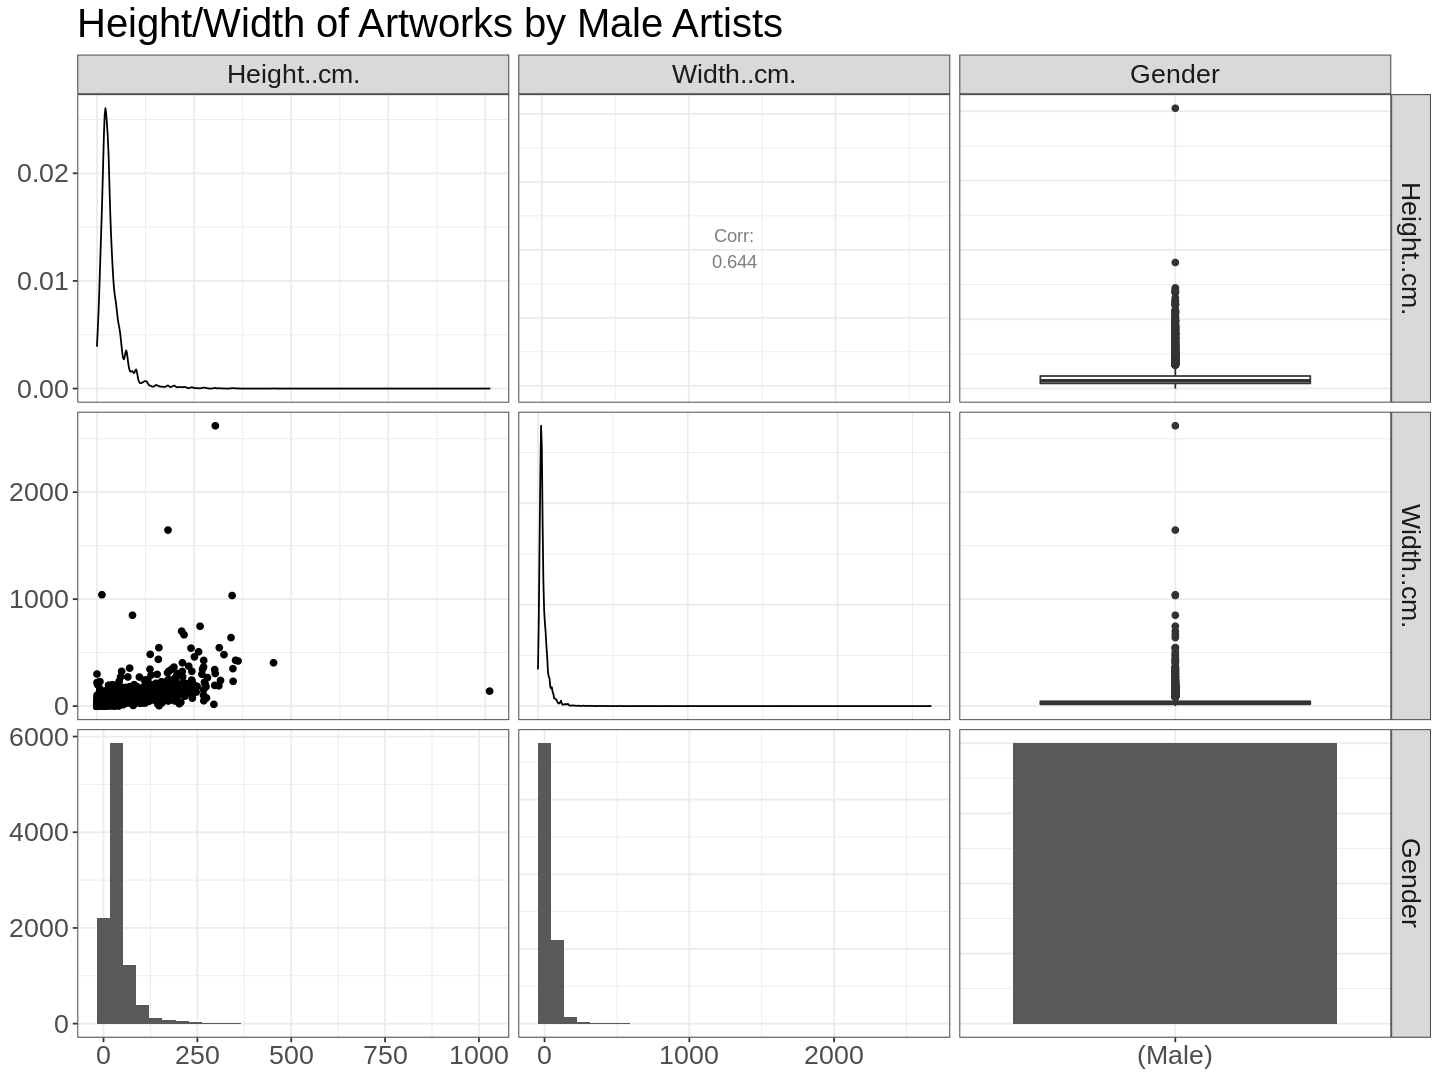

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 111 rows containing missing values”
Warning message:
“Removed 111 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 111 rows containing missing values (geom_point).”
Warning message:
“Removed 111 rows containing non-finite values (stat_density).”
Warning message:
“Removed 111 rows containing non-finite values (stat_boxplot).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 111 rows containing non-finite values (stat_bin).”


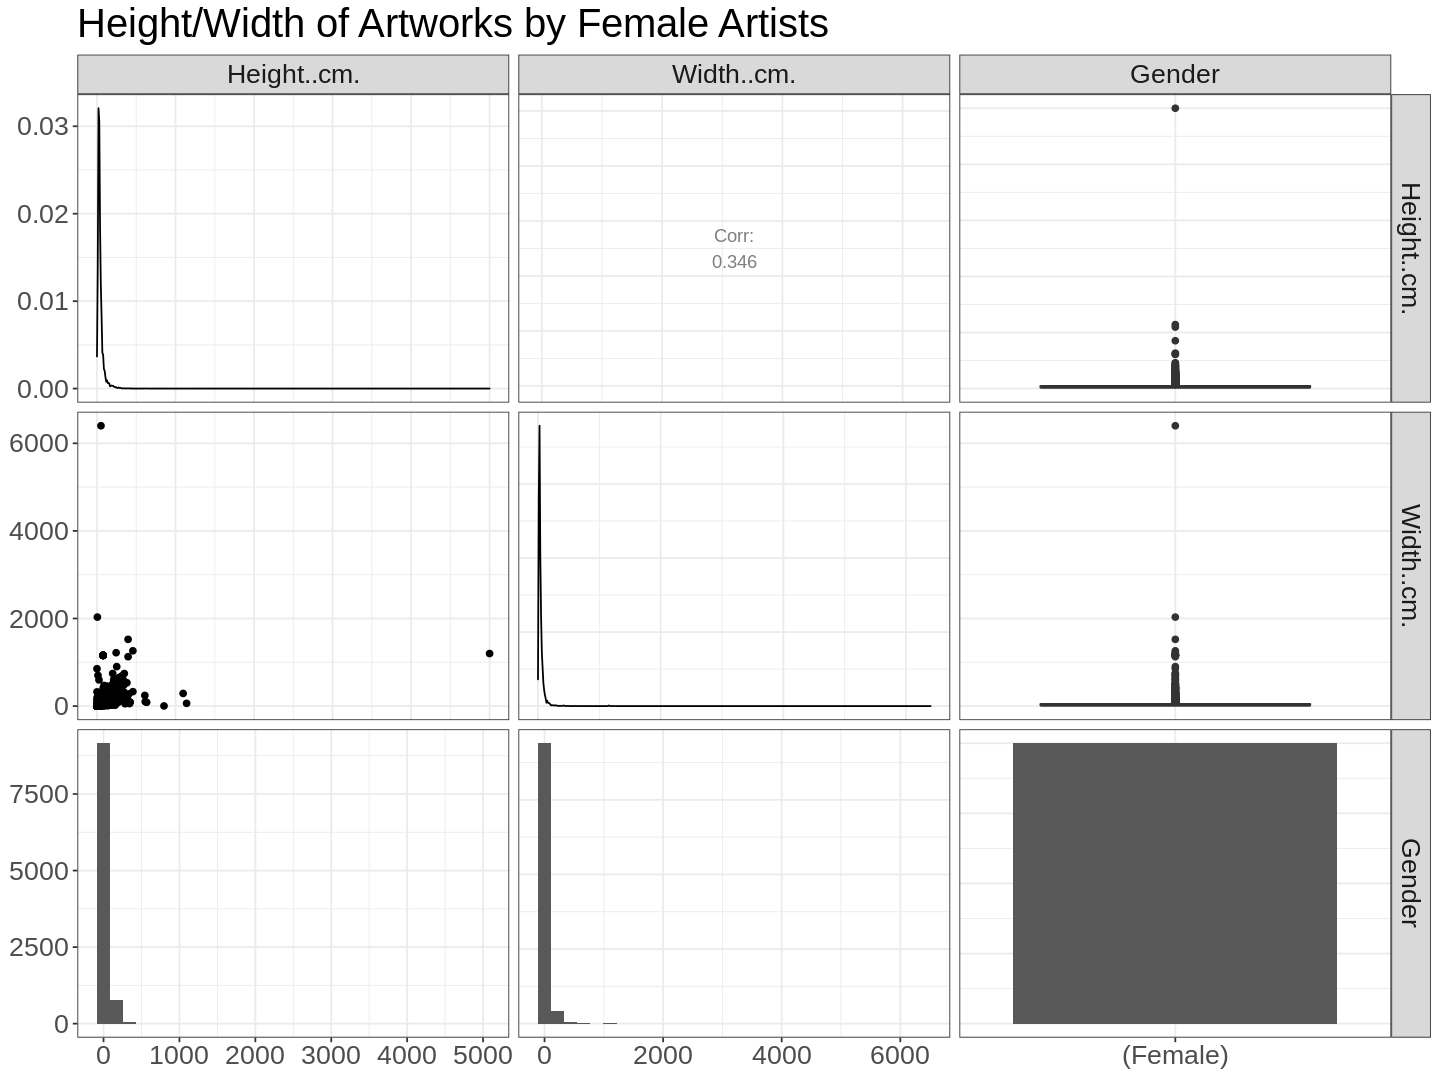

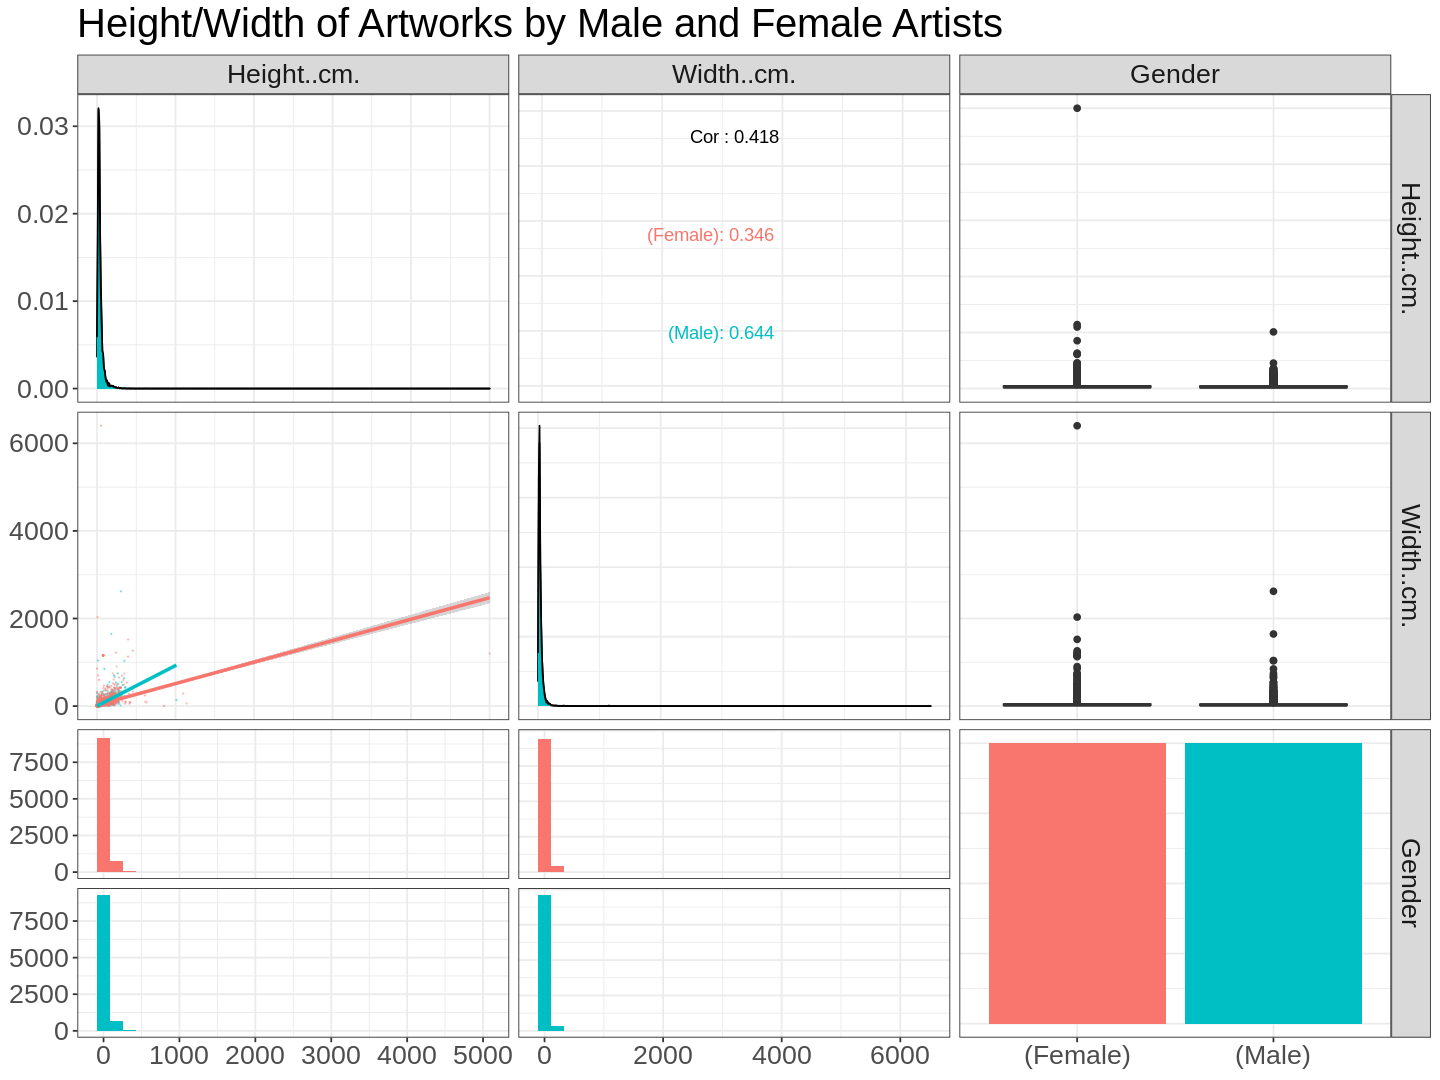

In [7]:
options(repr.plot.width = 12, repr.plot.height = 9) 
male_art_plot <- artworks_male_sample %>%
                 ggpairs(title = "Height/Width of Artworks by Male Artists")  +
                 theme_bw() +
                 theme(text = element_text(size = 20))
                 
male_art_plot

female_art_plot <- artworks_female_sample %>%
                   ggpairs(title = "Height/Width of Artworks by Female Artists")  +
                   theme_bw() +
                   theme(text = element_text(size = 20))
                   
female_art_plot

male_and_female_plot <- artworks_both_sample %>%
                   ggpairs(title = "Height/Width of Artworks by Male and Female Artists", mapping = ggplot2::aes(colour=Gender), 
               lower = list(continuous = wrap("smooth", alpha = 0.3, size=0.1)))  +
                   theme_bw() +
                   theme(text = element_text(size = 20))
male_and_female_plot

**Methods** (Hesham)

From the histogram visualization above, there is a slight uneven distribution between the sizes of female art and male art. For next steps, our task is to conduct predictive analysis and try to categorize if an art piece is made by a male or female artist, using the predictors of height and width. 

To do this, we will conduct classifaction analysis using K nearest neighbors, and tuning the number of neighbours to find the best K to classify the artist's gender. For that, we will specify the model calculate the straight line distance to the nearest neighbors (`rectangular`), engine will be `kknn`, and mode will be `classification`. We have already split our data into training and testing, therefore we can use the `tune()` function to find the best number for K.

Next, we will train our classifier 





**Expected Outcomes and Significance** (All)

50-75wds